                                #This notebook provides the pharamcokinetic profiles for the DLC paper

In [1]:
#initialize

#global
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


#local
from sys import path
path.insert(1, r'C:\dlc_projects\Analysis\git_repo\util')

from iteration import dlc_iter
from kinematics import dlc_kinematics
from visualization_config import visual_config


#class init
kinematic=dlc_kinematics() 
iter=dlc_iter()
visual_config=visual_config()


In [8]:
# process dataset
file=r'C:\dlc_projects\Analysis\Currencodes\DLC_refact\d_base\d_base.npy'
#the main groups
groups=['LID', 'SKF', 'SUM', 'D1A', 'D2A']



#load variables and for a dataframe with mean values of each treatment in each recording time after 
funcs= (kinematic.npy_ar, kinematic.npy_rot_speed, kinematic.npy_thet_head, kinematic.npy_translation)
df_ready=iter.get_sns(file, groups, funcs)
k_df=pd.DataFrame(df_ready, columns=[i.__name__ for i in funcs]+['time','treatment','id']).dropna()


k_df.replace({'treatment' : { 'SKF' : 'D1Ag',  'SUM' :'D2Ag',

                       'LID':'LD-3mg' }}, inplace=True)

k_df.head()


,npy_ar,npy_rot_speed,npy_thet_head,npy_translation,time,treatment,id
0,44.662458,-0.283585,58.346994,0.935019,10,D1A,26_D1A
1,80.665364,-1.128049,19.085853,1.652977,100,D1A,26_D1A
2,46.535674,-0.309196,52.895482,0.950996,20,D1A,26_D1A
3,45.355266,-0.239663,50.660065,0.882327,30,D1A,26_D1A
4,47.055633,-0.161912,48.113917,0.881105,40,D1A,26_D1A


                                                '''       Boxplots      '''

In [23]:
#specify treatment groups

dataframe=k_df[k_df['treatment'].isin(['D1Ag', 'LD-3mg', 'D2Ag'])]

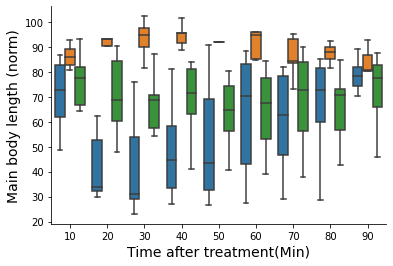

In [24]:

ax=sns.boxplot(x='time', y='npy_ar', hue='treatment', data=dataframe, showfliers=False, palette=visual_config.treatment_colors)


xlabel='Time after treatment(Min)'
ylabel='Main body length (norm)'


ax=visual_config.kinematic_box(ax, xlabel, ylabel, legend=False)
plt.draw()

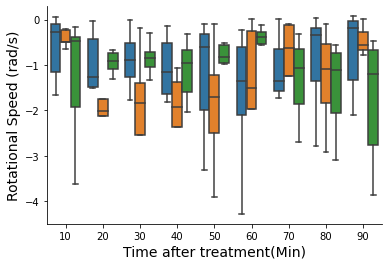

In [4]:
ax=sns.boxplot(x='time', y='npy_rot_speed', hue='treatment', data=dataframe, showfliers=False, palette=visual_config.treatment_colors)


xlabel='Time after treatment(Min)'
ylabel='Rotational Speed (rad/s)'


ax=visual_config.kinematic_box(ax, xlabel, ylabel, legend=False)
plt.draw()

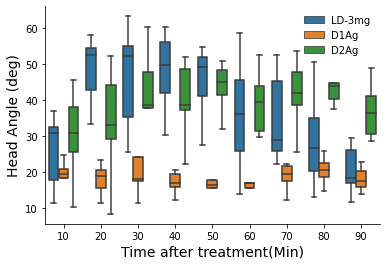

In [6]:
ax=sns.boxplot(x='time', y='npy_thet_head', hue='treatment', data=dataframe, showfliers=False, palette=visual_config.treatment_colors)


xlabel='Time after treatment(Min)'
ylabel='Head Angle (deg)'


ax=visual_config.kinematic_box(ax, xlabel, ylabel, legend=visual_config.legend)
plt.draw()